<a href="https://colab.research.google.com/github/AnaIsabelOsorio/SO-Lab3-20252/blob/main/analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sistemas Operativos**
# **Laboratorio 3**



---


Jeferson Alexander del Rio

Ana Isabel Patiño Osorio

In [ ]:
import pandas as pd

## **Análisis de π**

# **Evaluación de Ts**

Se ejecutó el programa serial ./pi_s 2000000000. Este tiempo corresponde a Ts. Teniendo como resultado:

In [ ]:
pi is approximately = 3.14159265358983885719
Error               = 0.00000000000004574119
Tiempo (serial)     = 6.026980

# **Evaluación de Tp**



In [ ]:
import pandas as pd

data = {
    "N (hilos)": ["Serial (Ts)", 1, 4, 8, 16],
    "Tp (s)": [6.026980, 6.055988, 1.798733, 1.886171, 1.831528]
}

df = pd.DataFrame(data)
df


,N (hilos),Tp (s)
0,Serial (Ts),6.026980
1,1,6.055988
2,4,1.798733
3,8,1.886171
4,16,1.831528


# **Tabla de resultados**

In [ ]:
Ts = 6.026980

df = pd.DataFrame(data)

df["N"] = pd.to_numeric(df["N (hilos)"], errors="coerce").fillna(1)

df["Speedup"] = Ts / df["Tp (s)"]
df["Eficiencia"] = df["Speedup"] / df["N"]

df


,N (hilos),Tp (s),N,Speedup,Eficiencia
0,Serial (Ts),6.026980,1.0,1.000000,1.000000
1,1,6.055988,1.0,0.995210,0.995210
2,4,1.798733,4.0,3.350681,0.837670
3,8,1.886171,8.0,3.195352,0.399419
4,16,1.831528,16.0,3.290684,0.205668


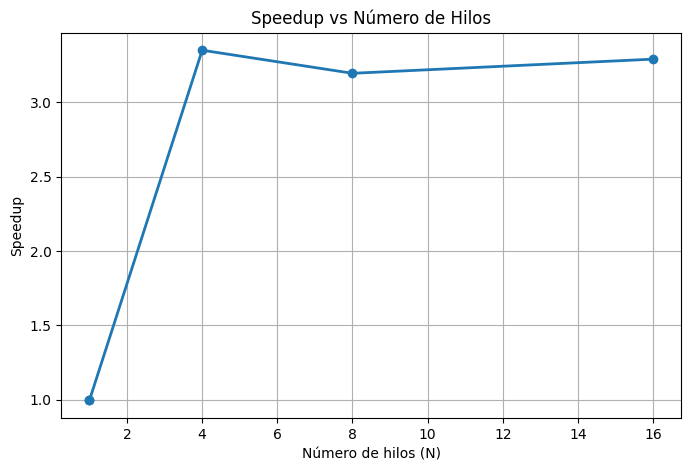

In [ ]:
import matplotlib.pyplot as plt

df = pd.DataFrame(data)

df["N"] = pd.to_numeric(df["N (hilos)"], errors="coerce").fillna(1)

df["Speedup"] = Ts / df["Tp (s)"]

plt.figure(figsize=(8,5))
plt.plot(df["N"], df["Speedup"], marker="o", linewidth=2)
plt.xlabel("Número de hilos (N)")
plt.ylabel("Speedup")
plt.title("Speedup vs Número de Hilos")
plt.grid(True)
plt.show()


# **Análisis**

**Comparación entre el rendimiento de Tp(1) y Ts**

Cuando comparamos el tiempo serial Ts = 6.026980 s con el tiempo paralelo usando un solo hilo Tp(1) = 6.055988 s, vemos que el programa paralelo es ligeramente más lento. Esto es normal: incluso con un solo hilo, el uso de pthreads introduce overhead adicional como creación y gestión del hilo, estructuras internas y sincronización. En otras palabras, el paralelismo agrega costos que no existen en la versión totalmente serial, por eso Tp(1) > Ts.

**Speedup máximo alcanzado y relación con los núcleos físicos del sistema**

El mejor speedup obtenido fue aproximadamente 3.35 con 4 hilos, lo cual coincide bastante bien con la cantidad típica de núcleos físicos en muchos equipos (normalmente 4). A partir de ese punto, agregar más hilos no mejora el rendimiento e incluso lo empeora, porque se saturan los núcleos y aparecen efectos como cambios de contexto, competencia por recursos y menor aprovechamiento real de los hilos.

**Tendencia de la eficiencia conforme aumenta el número de hilos**

La eficiencia disminuye a medida que aumentamos el número de hilos. Con 4 hilos todavía es alta (≈84%), pero al pasar a 8 o 16 cae bastante. Esto sucede porque, una vez se usan todos los núcleos físicos, los hilos extra ya no aportan trabajo útil y solo generan más overhead: más cambios de contexto, más espera y más sincronización. Además, por la Ley de Amdahl, la parte serial del programa limita la ganancia total, por lo que agregar hilos tiene un retorno cada vez menor.

# Sección 2: Análisis de Fibonacci


Comando ejecutado en la terminal: ./fibonacci 15

Resultado: 0 1 1 2 3 5 8 13 21 34 55 89 144 233 377

En este programa, el hilo principal main realiza los siguientes pasos:

1. Lee el valor N desde la línea de comandos.
2. Reserva memoria dinámica para un arreglo de tamaño N usando malloc.
3. Crea una estructura fib_args_t que contiene:
   - un puntero al arreglo compartido arr;
   - el número de elementos a generar N.
4. Pasa la dirección de esa estructura como argumento a pthread_create, de modo que el hilo trabajador reciba toda la información necesaria en el parámetro void* arg.

El hilo trabajador fib_worker hace un *cast* de arg a fib_args_t* y, a partir de ahí:

- usa el puntero arr para escribir directamente en el arreglo compartido;
- usa N para saber cuántos elementos debe calcular;
- inicializa arr[0] y arr[1] si N lo permite y luego completa el resto de la secuencia en un bucle.

### Rol de pthread_join

El hilo principal llama a: thread_join(worker, NULL);